In [27]:
import cv2
import os

In [50]:
# contour

path_img = './front1/front_image/000000.jpg'

def lane(img, X, Y, W, H):
    global path_img
    ## 파일 불러오기
    img = cv2.imread(img, cv2.IMREAD_COLOR)
    # ROI 지정
    roi = img[Y:Y+H, X:X+W]
    roi2 = roi.copy()
    
    ## 차선 부분 추출
    # BGR -> HSV 영역 전환
    roi2_hsv = cv2.cvtColor(roi2, cv2.COLOR_BGR2HSV)
    
    # 색 범위 지정
    low = (0, 0, 190)
    up = (250, 90, 250)
    
    roi2_mask = cv2.inRange(roi2_hsv, low, up)
    roi2_result = cv2.bitwise_and(roi2, roi2, mask = roi2_mask)


    final_img = roi2_result.copy()
    
    # HSV -> BGR -> GRAY 로 전환
    final_img = cv2.cvtColor(final_img, cv2.COLOR_HSV2BGR)
    final_img = cv2.cvtColor(final_img, cv2.COLOR_BGR2GRAY)
 

    ## contour 직사각형으로 출력
    lane_line = []
    contours, hierarchy = cv2.findContours(final_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    for c in contours:
        x, y, w, h = cv2.boundingRect(c)
        cv2.rectangle(final_img, (x, y), (x + w, y + h), (255, 0, 0), 1)
        lane_line.append((x, y, w, h))
        
        
    cv2.imshow('result', final_img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
   

In [51]:
lane(path_img, 0, 360, 1920, 400)

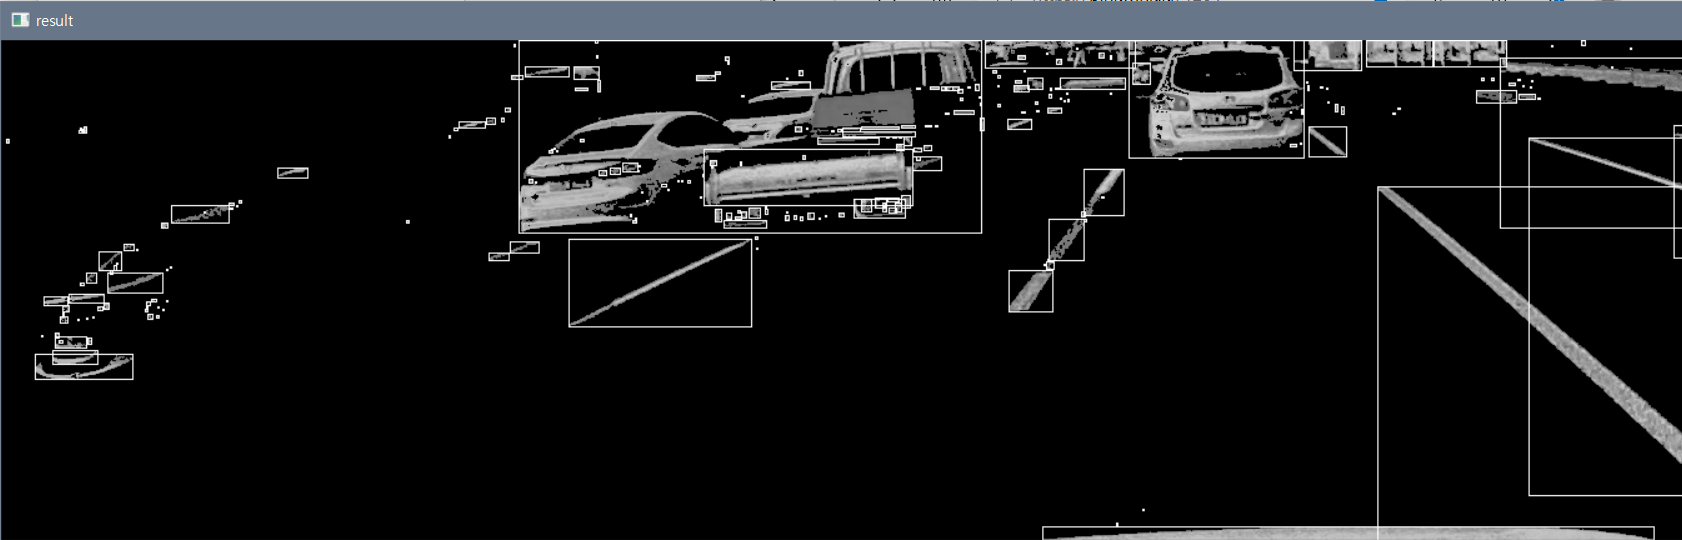

dst, contours, hierarchy = cv2.findContours(src, mode, method, contours, hierarchy, offset)

> src: 입력 영상, 검정과 흰색으로 구성된 바이너리 이미지   

> mode: 컨투어 제공 방식   
   >> cv2.RETR_EXTERNAL: 가장 바깥쪽 라인만 생성   
   >> cv2.RETR_LIST: 모든 라인을 계층 없이 생성   
   >> cv2.RET_CCOMP: 모든 라인을 2 계층으로 생성   
   >> cv2.RETR_TREE: 모든 라인의 모든 계층 정보를 트리 구조로 생성   
   
> method: 근사 값 방식    
   >> cv2.CHAIN_APPROX_NONE: 근사 없이 모든 좌표 제공   
   >> cv2.CHAIN_APPROX_SIMPLE: 컨투어 꼭짓점 좌표만 제공    
   >> cv2.CHAIN_APPROX_TC89_L1: Teh-Chin 알고리즘으로 좌표 개수 축소   
   >> cv2.CHAIN_APPROX_TC89_KC0S: Teh-Chin 알고리즘으로 좌표 개수 축소   
   
> contours(optional): 검출한 컨투어 좌표 (list type)   

> hierarchy(optional): 컨투어 계층 정보 (Next, Prev, FirstChild, Parent, -1 [해당 없음])   

> offset(optional): ROI 등으로 인해 이동한 컨투어 좌표의 오프셋   


> x, y, w, h = cv2.boundingRect(contour): 좌표를 감싸는 사각형 반환
    >> x, y: 사각형의 왼쪽 상단 좌표   
    >> w, h: 사각형의 폭과 높이

In [7]:
import numpy as np
import cv2
import os

In [52]:
# roi & bitwise_and

path_img = './front1/front_image/000000.jpg'

def lane(img):
    ## 파일 불러오기
    img = cv2.imread(img, cv2.IMREAD_COLOR)
    img2 = img.copy()
    
    ## 차선 부분 추출
    # BGR -> HSV 영역 전환
    img2_hsv = cv2.cvtColor(img2, cv2.COLOR_BGR2HSV)
    
    # 색 범위 지정
    low = (0, 0, 190)
    up = (250, 90, 250)
    
    img2_mask = cv2.inRange(img2_hsv, low, up)
    img2_result = cv2.bitwise_and(img2, img, mask = img2_mask)

    # 관심영역 설정
    region = np.array([[(400, 1080),
                                     (800, 400),
                                     (1250, 400),                                
                                    (1920, 1080)]], dtype = np.int64)

    # 까만 배경
    mask = np.zeros_like(img)
    # 구역 설정
    cv2.fillPoly(mask, region, 255)
    
    masked_img = cv2.bitwise_and(img2_result, mask)
    cv2.imshow('test', masked_img)
    
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [53]:
lane(path_img)

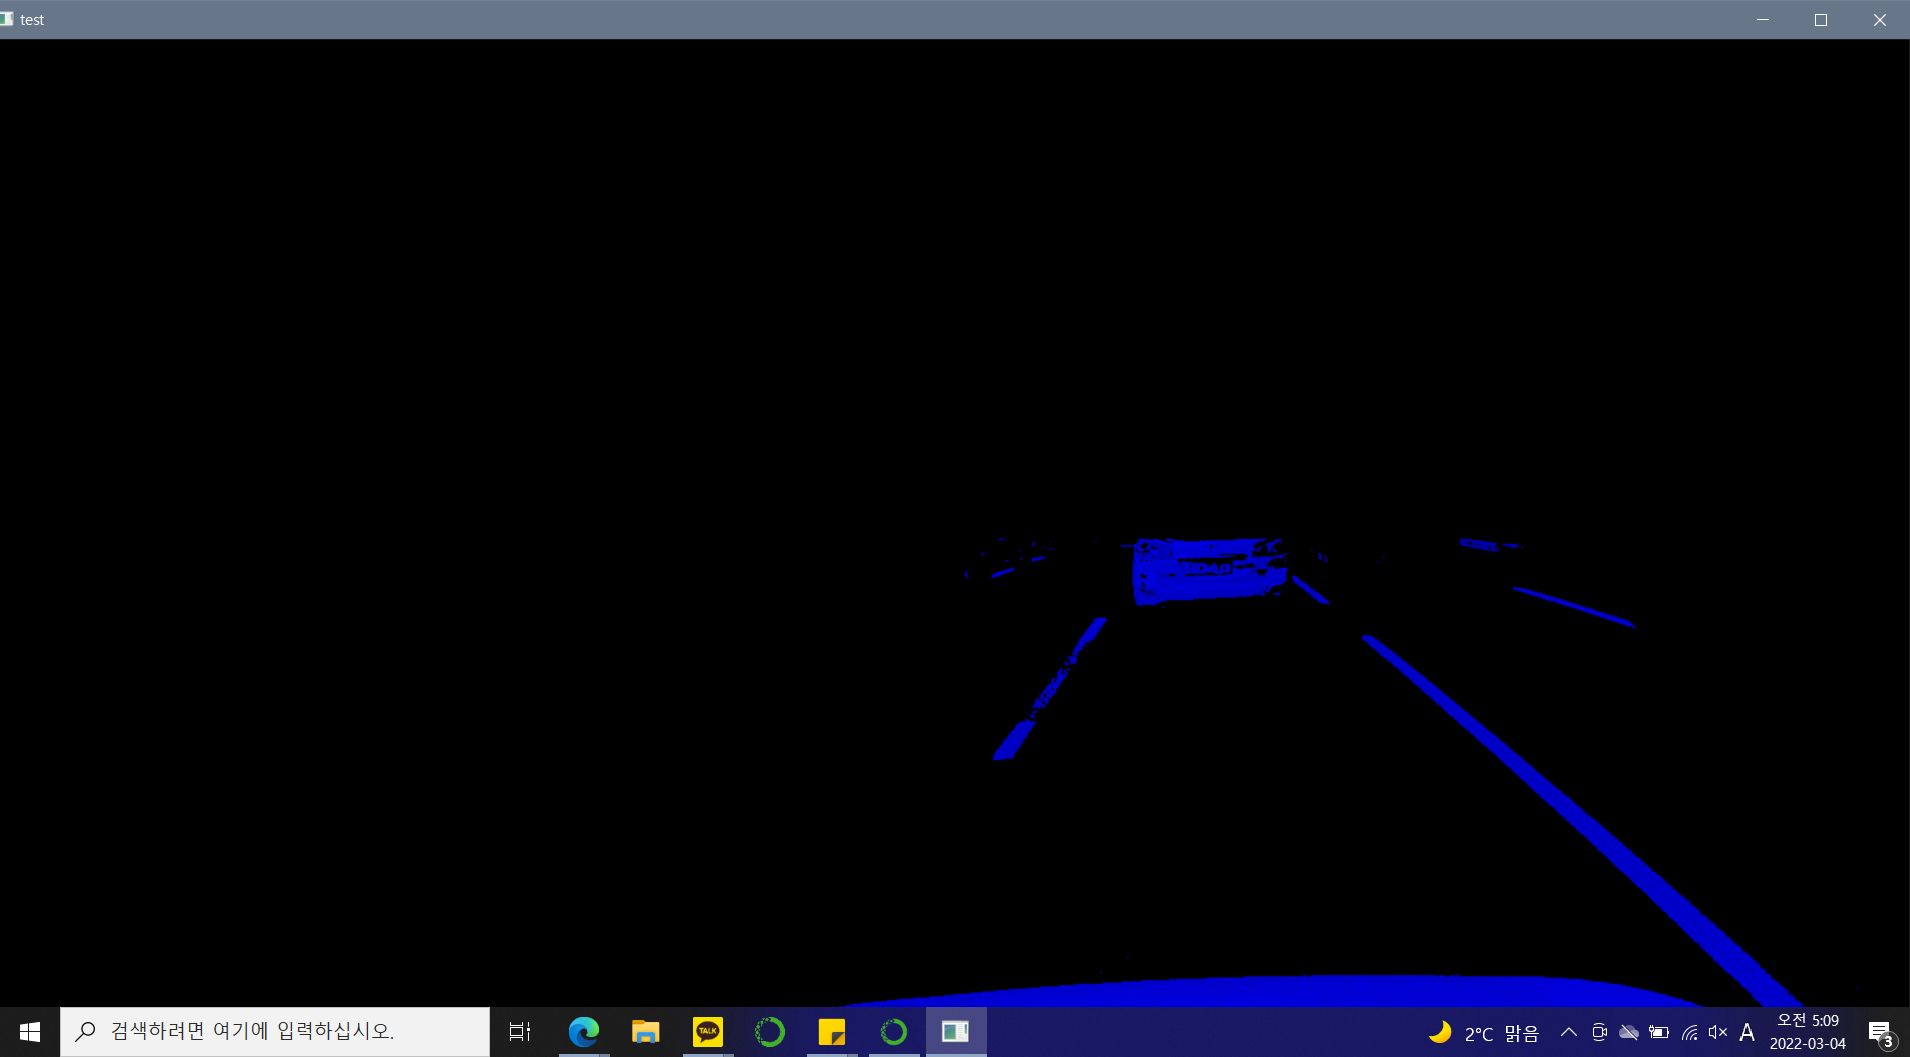

In [33]:
import os
from PIL import Image
import numpy as np
import cv2

In [25]:
# 캐니 엣지
path_img = './front1/front_image/000000.jpg'

def onChange(pos):
    pass

def canny_edge_detection(img):
    img = cv2.imread(img, cv2.IMREAD_GRAYSCALE)
    
    kernel1d = cv2.getGaussianKernel(5, 5)
    kernel2d = np.outer(kernel1d, kernel1d.transpose())
    
    filtered_array = cv2.filter2D(img, -1, kernel2d)
    
    cv2.namedWindow('Canny Edge Detection', cv2.WINDOW_NORMAL)
    
    cv2.createTrackbar('threshold1', 'Canny Edge Detection', 0, 300, onChange)
    cv2.createTrackbar('threshold2', 'Canny Edge Detection', 0, 300, onChange)
    cv2.imshow('Canny Edge Detection', filtered_array)
    
    while True:
        k = cv2.waitKey(0) & 0xFF
        
        if k == 27:
            break
            
        low = cv2.getTrackbarPos('threshold1', 'Canny Edge Detection')
        high = cv2.getTrackbarPos('threshold2', 'Canny Edge Detection')
        
        if low > high:
            print('threshold1은 threshold2보다 커야합니다.')
    
        else:
            # low = 70, high = 120 이 괜찮아보임
            canny = cv2.Canny(filtered_array, low, high)
            cv2.imshow('Canny Edge Detection', canny)


    cv2.destroyAllWindows()
    

In [54]:
canny_edge_detection(path_img)

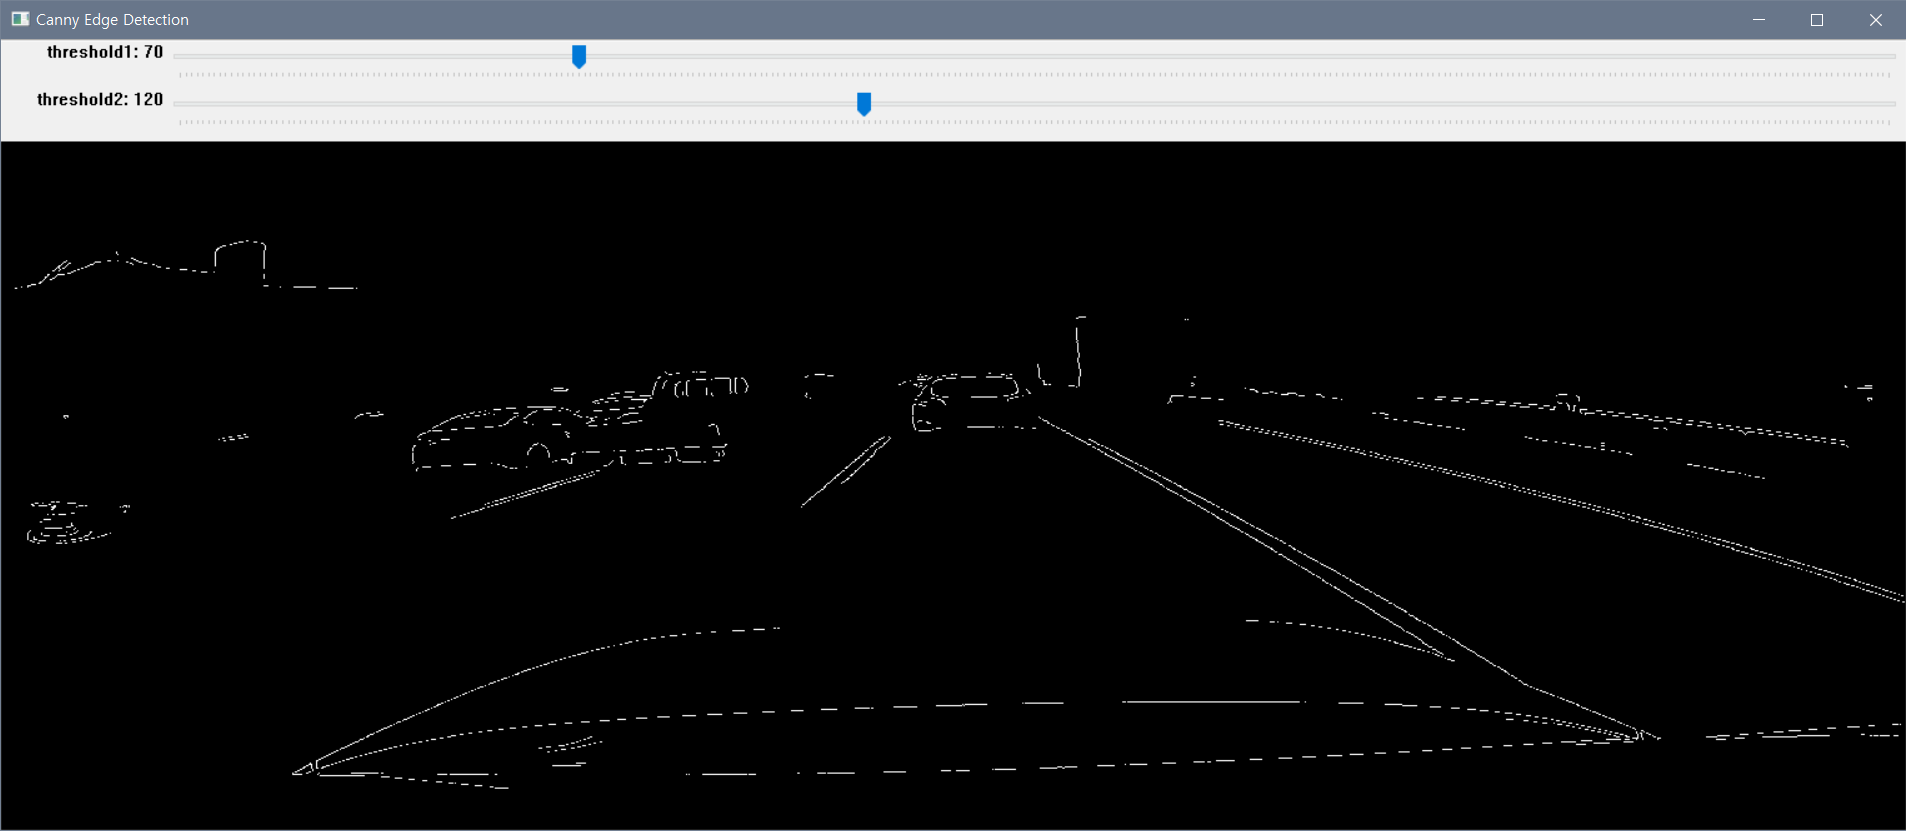